In [1]:
!pip install pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.2 MB/s eta 0:00:00


In [2]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes

In [3]:
def encrypt(pt, key, mode, iv=None):
    # Convert plaintext to bytes if it's a string
    if isinstance(pt, str):
        pt = pt.encode()  # Convert plaintext to bytes

    # Pad the plaintext to the AES block size (16 bytes)
    pt = pad(pt, AES.block_size)

    # Handle IV: If not provided, generate a random 16-byte IV
    if iv is None:
        iv = get_random_bytes(16)  # Generate a random 16-byte IV if not provided
    elif isinstance(iv, str):
        iv = bytes.fromhex(iv)  # Convert IV from hex string to bytes if it's a string

    # AES cipher instance based on mode
    if mode == 1:  # ECB Mode
        cipher = AES.new(key, AES.MODE_ECB)
        ciphertext = cipher.encrypt(pt)

    elif mode == 2:  # CBC Mode
        cipher = AES.new(key, AES.MODE_CBC, iv)
        ciphertext = cipher.encrypt(pt)

    elif mode == 3:  # OFB Mode
        cipher = AES.new(key, AES.MODE_OFB, iv)
        ciphertext = cipher.encrypt(pt)

    # Return the ciphertext as a bytes object (not hex)
    return ciphertext

In [4]:
def decrypt(ct, key, mode, iv=None):
    # AES cipher instance based on the mode
    if mode == 1:  # ECB Mode (No IV)
        cipher = AES.new(key, AES.MODE_ECB)
        decrypted_text = cipher.decrypt(ct)

    elif mode == 2:  # CBC Mode (Requires IV)
        if iv is None:
            raise ValueError("IV is required for CBC mode")
        if isinstance(iv, str):
            iv = bytes.fromhex(iv)  # Convert IV from hex string to bytes
        cipher = AES.new(key, AES.MODE_CBC, iv)
        decrypted_text = cipher.decrypt(ct)

    elif mode == 3:  # OFB Mode (Requires IV)
        if iv is None:
            raise ValueError("IV is required for OFB mode")
        if isinstance(iv, str):
            iv = bytes.fromhex(iv)  # Convert IV from hex string to bytes
        cipher = AES.new(key, AES.MODE_OFB, iv)
        decrypted_text = cipher.decrypt(ct)

    else:
        raise ValueError("Invalid mode. Use 1 for ECB, 2 for CBC, or 3 for OFB.")

    # Unpad the decrypted text to get the original plaintext
    try:
        decrypted_text = unpad(decrypted_text, AES.block_size)
    except ValueError:
        print("Unpadding failed: Padding is incorrect.")
        return None

    # Return the decrypted text as raw bytes (for binary data like images)
    return decrypted_text  # Do not decode to a string if it's binary data

In [5]:
pt = "435_15_fun_1f_y0u_kn0w_h0w_17_w0rk5"
key = "0d5b4267c2370ecf67bd9b9bdba7bfe0"
iv = "662bc70aab50862d984d2cce641bb1e9"

In [6]:
# prompt: download image from google drive link

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1HPJ8e48uR54mNgPUj6d41VSpR08AkiIL',
                                    dest_path='./original.bmp')

In [7]:
import PIL

def view_image(filename):
  img = PIL.Image.open(filename)
  display(img)

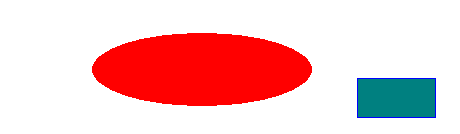

In [8]:
with open("original.bmp", "rb") as f:
  pt = f.read()

view_image("original.bmp")

In [9]:
key = b'\r[Bg\xc27\x0e\xcfg\xbd\x9b\x9b\xdb\xa7\xbf\xe0'
iv = b'\xb6p\x08c-\xa3\xbc)W\x82\x92\x9az\x06e\x85'

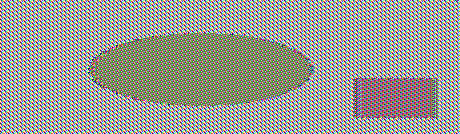

In [10]:
ct = encrypt(pt,key,1)
ct = list(ct)
ct[:54] = list(pt)[:54] # First 54 bytes are bmp header ( Needs to be correct for viewing)
ct = bytes(ct)
with open("encrypted_ecb.bmp", "wb") as f:
  f.write(ct)

view_image("encrypted_ecb.bmp")

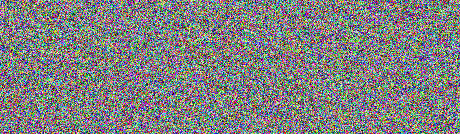

In [11]:
ct = encrypt(pt,key,2)
ct = list(ct)
ct[:54] = list(pt)[:54]
ct = bytes(ct)
with open("encrypted_cbc.bmp", "wb") as f:
  f.write(ct)

view_image("encrypted_cbc.bmp")

In [12]:
pt = "CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447"
key = b'\xb4\xe3\x01\xb7(\x93\x98*\x8b\xf8\xe8D\x80\xa6[\x85'
iv = b'\xb2\xeb~\xb3|d]\xa6B\x7f\x18\x9b\xac\xf2\xe0\x14'

In [ ]:
# Encrypt using ECB
ct = encrypt(pt,key,1)
ct = list(ct)
ct[29] = ct[29] ^ 0x01
ct = bytes(ct)
with open("enc_cbc", "wb") as f:
  f.write(ct)

# decrypt using ECB
pt = decrypt(ct,key,1)
print(pt)

b'CSE447CSE447CSE4\x14s\xe5\x87\xfb\xf4D}\x04O\xaf\xeb^\x82\xd4\xe1E447CSE447CSE547CSE447CSE447CSE447CSE447'


In [ ]:
# Encrypt using CBC
ct = encrypt(pt,key,2,iv)
ct = list(ct)
ct[29] = ct[29] ^ 0x01
ct = bytes(ct)
with open("enc_cbc", "wb") as f:
  f.write(ct)

# decrypt using CBC
pt = decrypt(ct,key,2,iv)
print(pt)

b'CSE447CSE447CSE4\xf5h\x92c^]\xfc\x91\xf4\x97\x97\x87\x1f\xf0\xca\x92E447CSE447CSE547CSE447CSE447CSE447CSE447'


In [13]:
# Encrypt using OFB
ct = encrypt(pt,key,3,iv)
ct = list(ct)
ct[29] = ct[29] ^ 0x01
ct = bytes(ct)
with open("enc_cbc", "wb") as f:
  f.write(ct)

# decrypt using OFB
pt = decrypt(ct,key,3,iv)
print(pt)

b'CSE447CSE447CSE447CSE447CSE446CSE447CSE447CSE447CSE447CSE447CSE447CSE447'
